# Ejercicio 1 con X y Y lineal

## Grafico de los Datos

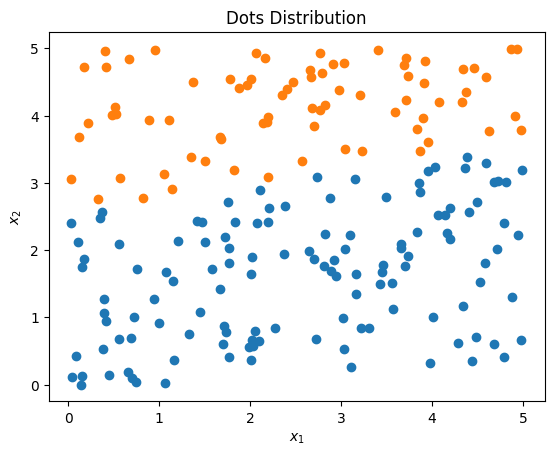

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

x_real = pd.read_csv('X.csv')
y_real = pd.read_csv('y.csv')
y_real['label'] = y_real['label'].replace(0, -1)

x_real.drop('num', axis=1, inplace=True)
y_real.drop('num', axis=1, inplace=True)

x0_real = x_real[y_real['label']==-1]
x1_real = x_real[y_real['label']==1]
plt.scatter(x0_real['x1'], x0_real['x2'])
plt.scatter(x1_real['x1'], x1_real['x2'])
plt.title('Dots Distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


# Funciones a usar

In [2]:
import random
import numpy as np

def perceptron(x,w):
    xx = np.array(x)
    ww = np.array(w)
    z = int(np.dot(ww,np.transpose(xx)))
    return activation_function(z)
    
def activation_function(z):
    if z >= 0:
        return 1
    else:
        return -1
    
def random_weights(l):
    weights = [random.randint(0, 7) for _ in range(l)]
    return weights

def accuracy(yi, y):
    correctos = 0
    for i in range(len(yi)):
        if yi[i] == y[i]:
            correctos = correctos + 1
    return correctos/(len(yi) + 1)

## Solucion con el Algoritmo Batch

In [3]:
# Algoritmo de batch
epoch = 100
n = 0.2

xReal = x_real.values.tolist()
xReal = [[1] + xi for xi in xReal]
yReal = y_real.values.tolist()
yReal = [yi for list in yReal for yi in list]

w = random_weights(len(xReal[0]))
yPred= []
acc = []

for _ in range(epoch):
    yPred.clear()
    for xi in xReal:
        yi = perceptron(xi,w)
        yPred.append(yi)

    for i in range(len(yReal)):
        xri = np.array(xReal[i])
        wnp = np.array(w)
        wnp = wnp + n*(yReal[i] - yPred[i])*xri
        w = wnp.tolist()
    acc.append(accuracy(yPred, yReal))

## Resultados con Algoritmo Batch

El accuracy final del modelo es:  0.9950248756218906
Los pesos encontrados fueron: 
w_0: -329.1999999999984
w_1: -32.61883298540741
w_2: 132.17744532220286


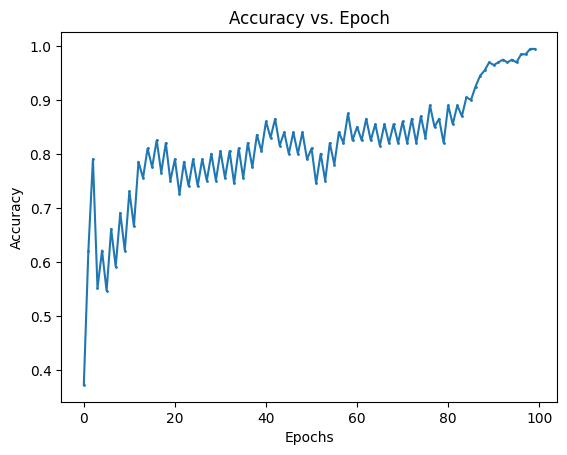

In [4]:
print('El accuracy final del modelo es: ', accuracy(yPred, yReal))
print('Los pesos encontrados fueron: ')

for i in range(len(w)):
    print('w_' + str(i) + ': ' + str(w[i]))

plt.scatter(list(range(0,100)), acc, s=1)
plt.plot(list(range(0,100)), acc)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')

plt.show()

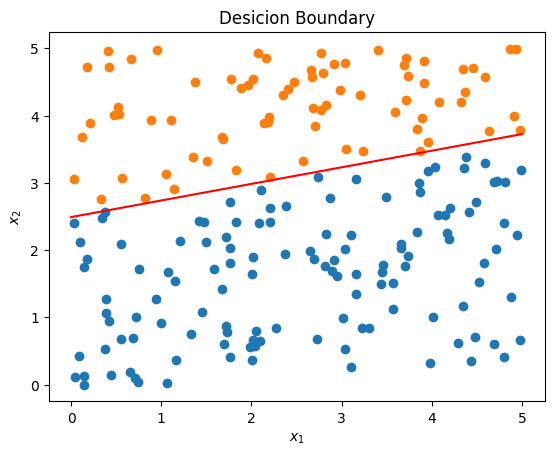

In [5]:
c1 = w[0]/-w[2]
c2 = w[1]/-w[2]

x_line = np.array(list(range(0,6)))
y_line = c1 + c2*x_line

plt.scatter(x0_real['x1'], x0_real['x2'])
plt.scatter(x1_real['x1'], x1_real['x2'])
plt.plot(x_line, y_line, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Desicion Boundary')
plt.show()

## Solucion con Algoritmo de Secuencia

In [6]:
epoch = 100
n = 0.2

xReal = x_real.values.tolist()
xReal = [[1] + xi for xi in xReal]
yReal = y_real.values.tolist()
yReal = [yi for list in yReal for yi in list]

w = random_weights(len(xReal[0]))
yPred= []
acc = []

for _ in range(epoch):
    for i in range(len(xReal)):
        yi = perceptron(xReal[i],w)
        yPred.append(yi)
        xri = np.array(xReal[i])
        wnp = np.array(w)
        wnp = wnp + n*(yReal[i] - yPred[i])*xri
        w = wnp.tolist()
    acc.append(accuracy(yPred, yReal))
    yPred.clear()

## Resultados con Algoritmo de Secuencia

El accuracy final del modelo es:  0.9950248756218906
Los pesos encontrados fueron: 
w_0: -21.999999999999986
w_1: -1.541749130084138
w_2: 8.160592991967226


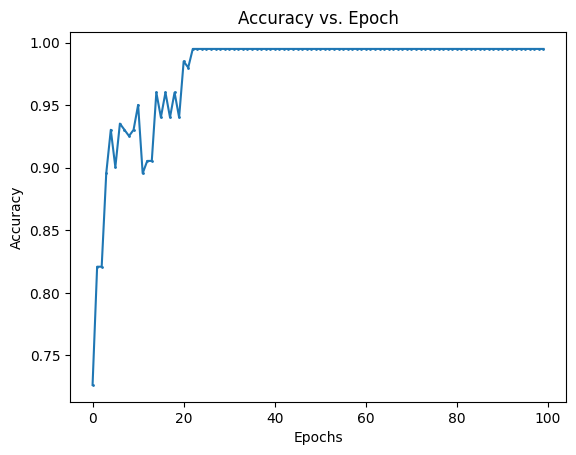

In [7]:
print('El accuracy final del modelo es: ', acc[-1])
print('Los pesos encontrados fueron: ')

for i in range(len(w)):
    print('w_' + str(i) + ': ' + str(w[i]))

plt.scatter(list(range(0,100)), acc, s=1)
plt.plot(list(range(0,100)), acc)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')

plt.show()

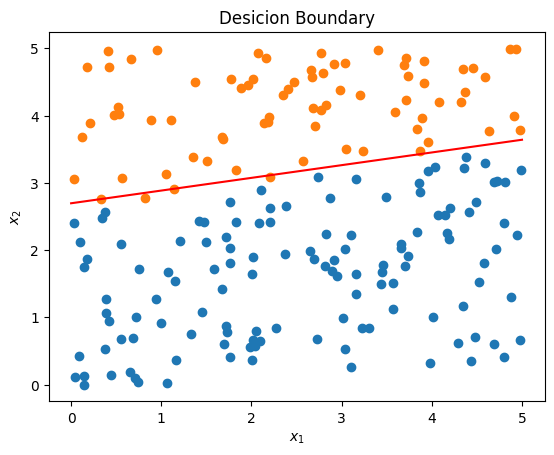

In [8]:
c1 = w[0]/-w[2]
c2 = w[1]/-w[2]

x_line = np.array(list(range(0,6)))
y_line = c1 + c2*x_line

plt.scatter(x0_real['x1'], x0_real['x2'])
plt.scatter(x1_real['x1'], x1_real['x2'])
plt.plot(x_line, y_line, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Desicion Boundary')
plt.show()